<a href="https://colab.research.google.com/github/TranTan1306/BaiTapAI/blob/main/AI_W4_25_02_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=c663c2987b0447687fa8a82f675485a1df3c556c823307c15d6f952ed41f8792
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


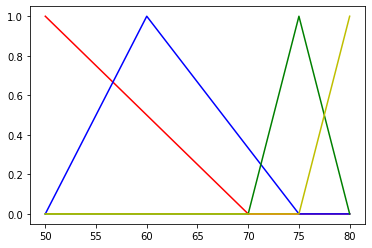

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x = np.arange(50,81,1)
slow = fuzz.trimf(x,[50,50,70])
medium = fuzz.trimf(x,[50,60,75])
medium_fast = fuzz.trimf(x,[70,75,80])
full_speed = fuzz.trimf(x,[75,80,80])

plt.figure()
plt.plot(x, slow, 'r', linewidth = 1.5, label = 'Slow')
plt.plot(x, medium, 'b', linewidth = 1.5, label = 'Medium')
plt.plot(x, medium_fast, 'g', linewidth = 1.5, label = 'Medium fast')
plt.plot(x, full_speed, 'y', linewidth = 1.5, label = 'Full speed')

26.666666666666657


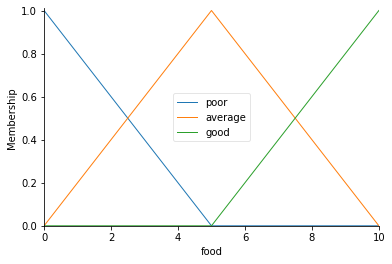

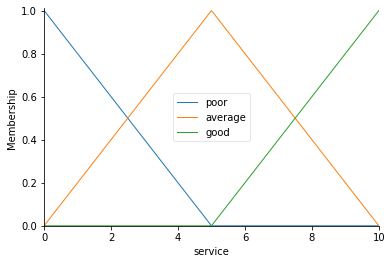

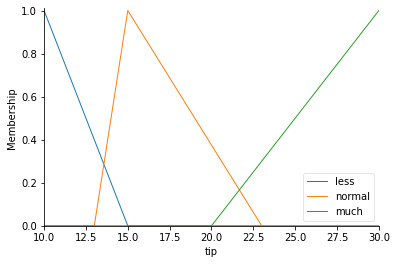

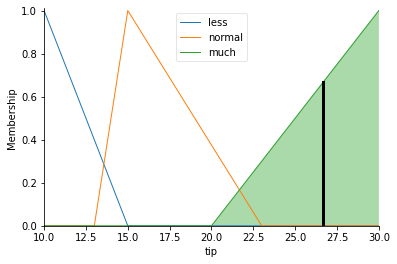

In [28]:
# FOOD, SERVICE, TIP
import numpy as mp
import skfuzzy as fuzz
from skfuzzy import control as ctrl

food = ctrl.Antecedent(np.arange(0,11,1), 'food')
service = ctrl.Antecedent(np.arange(0,11,1), 'service')
tip = ctrl.Consequent(np.arange(10,31,1), 'tip')

food['poor'] = fuzz.trimf(food.universe, [0,0,5])
food['average'] = fuzz.trimf(food.universe, [0,5,10])
food['good'] = fuzz.trimf(food.universe, [5,10,10])
service['poor'] = fuzz.trimf(service.universe, [0,0,5])
service['average'] = fuzz.trimf(service.universe, [0,5,10])
service['good'] = fuzz.trimf(service.universe, [5,10,10])
tip['less'] = fuzz.trimf(tip.universe, [10,10,15])
tip['normal'] = fuzz.trimf(tip.universe, [13,15,23])
tip['much'] = fuzz.trimf(tip.universe, [20,30,30])

food.view()
service.view()
tip.view()

rule1 = ctrl.Rule(food['poor'] & service['poor'], tip['less'])
rule2 = ctrl.Rule(food['poor'] & service['average'], tip['less'])
rule3 = ctrl.Rule(food['poor'] & service['good'], tip['normal']) 
rule4 = ctrl.Rule(food['average'] & service['poor'], tip['normal']) 
rule5 = ctrl.Rule(food['average'] & service['average'], tip['normal'])
rule6 = ctrl.Rule(food['average'] & service['good'], tip['much'])
rule7 = ctrl.Rule(food['good'] & service['poor'], tip['normal'])
rule8 = ctrl.Rule(food['good'] & service['average'], tip['much'])
rule9 = ctrl.Rule(food['good'] & service['good'], tip['much'])

tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food'] = 10
tipping.input['service'] = 10
tipping.compute()
print(tipping.output['tip'])
tip.view(sim = tipping)

62.11141678129298


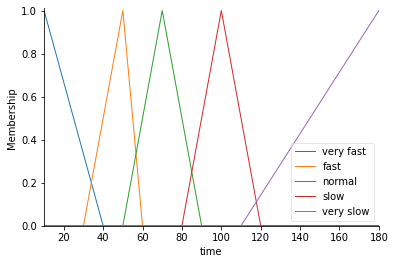

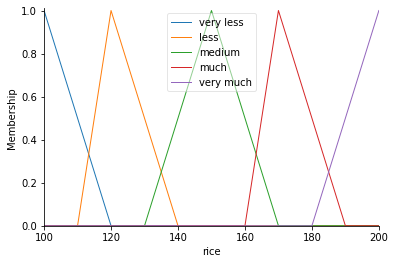

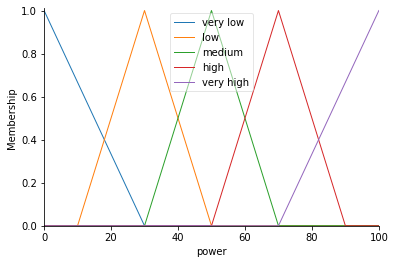

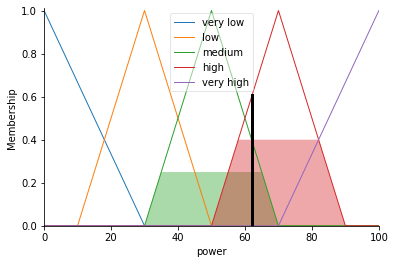

In [27]:
# TIME, RICE, POWER
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

time = ctrl.Antecedent(np.arange(10,181,10), 'time')
rice = ctrl.Antecedent(np.arange(100,201,10), 'rice')
power = ctrl.Consequent(np.arange(0,101,10), 'power')

time['very fast'] = fuzz.trimf(time.universe, [10,10,40])
time['fast'] = fuzz.trimf(time.universe, [30,50,60])
time['normal'] = fuzz.trimf(time.universe, [50,70,90])
time['slow'] = fuzz.trimf(time.universe, [80,100,120])
time['very slow'] = fuzz.trimf(time.universe, [110,180,180])

rice['very less'] = fuzz.trimf(rice.universe, [100,100,120])
rice['less'] = fuzz.trimf(rice.universe, [110,120,140])
rice['medium'] = fuzz.trimf(rice.universe, [130,150,170])
rice['much'] = fuzz.trimf(rice.universe, [160,170,190])
rice['very much'] = fuzz.trimf(rice.universe, [180,200,200])

power['very low'] = fuzz.trimf(power.universe, [0,0,30])
power['low'] = fuzz.trimf(power.universe, [10,30,50])
power['medium'] = fuzz.trimf(power.universe, [30,50,70])
power['high'] = fuzz.trimf(power.universe, [50,70,90])
power['very high'] = fuzz.trimf(power.universe, [70,100,100])

time.view()
rice.view()
power.view()

rule1 = ctrl.Rule(time['very fast'] & rice['very less'], power['medium'])
rule2 = ctrl.Rule(time['very fast'] & rice['less'], power['high'])
rule3 = ctrl.Rule(time['very fast'] & rice['medium'], power['high'])
rule4 = ctrl.Rule(time['very fast'] & rice['much'], power['very high'])
rule5 = ctrl.Rule(time['very fast'] & rice['very much'], power['very high'])
rule6 = ctrl.Rule(time['fast'] & rice['very less'], power['medium'])
rule7 = ctrl.Rule(time['fast'] & rice['less'], power['medium'])
rule8 = ctrl.Rule(time['fast'] & rice['medium'], power['high'])
rule9 = ctrl.Rule(time['fast'] & rice['much'], power['high'])
rule10 = ctrl.Rule(time['fast'] & rice['very much'], power['very high'])
rule11 = ctrl.Rule(time['normal'] & rice['very less'], power['low'])
rule12 = ctrl.Rule(time['normal'] & rice['less'], power['medium'])
rule13 = ctrl.Rule(time['normal'] & rice['medium'], power['medium'])
rule14 = ctrl.Rule(time['normal'] & rice['much'], power['medium'])
rule15 = ctrl.Rule(time['normal'] & rice['very much'], power['high'])
rule16 = ctrl.Rule(time['slow'] & rice['very less'], power['very low'])
rule17 = ctrl.Rule(time['slow'] & rice['less'], power['low'])
rule18 = ctrl.Rule(time['slow'] & rice['medium'], power['low'])
rule19 = ctrl.Rule(time['slow'] & rice['much'], power['medium'])
rule20 = ctrl.Rule(time['slow'] & rice['very much'], power['medium'])
rule21 = ctrl.Rule(time['very slow'] & rice['very less'], power['very low'])
rule22 = ctrl.Rule(time['very slow'] & rice['less'], power['very low'])
rule23 = ctrl.Rule(time['very slow'] & rice['medium'], power['low'])
rule24 = ctrl.Rule(time['very slow'] & rice['much'], power['medium'])
rule25 = ctrl.Rule(time['very slow'] & rice['very much'], power['medium'])

tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['time'] = 55
tipping.input['rice'] = 138
tipping.compute()
print(tipping.output['power'])
power.view(sim = tipping)